In [42]:
import numpy as np
import matplotlib.pyplot as plt
from loadMnist import loadMnist
from kNN import kNN 

In [43]:
# Load training and test data
trainingImages, trainingLabels = loadMnist('training')
testImages, testLabels = loadMnist('testing')

#all the labels we have
print(np.unique(trainingLabels))

[0 1 2 3 4 5 6 7 8 9]


In [44]:
# Keep a subset of the training (60,000 images) and test (10,000) data
trainingImages = trainingImages[:2000,:]
trainingLabels = trainingLabels[:2000]

# Test for only a subset of the dataset (e.g., 20 images) to keep the running time relatively low
testImages = testImages[:20,:]
testLabels = testLabels[:20]

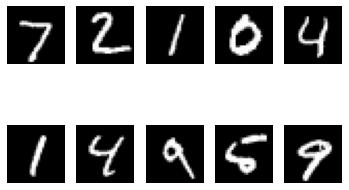

In [45]:
# Show the first ten digits
fig = plt.figure('First 10 Digits') 
for i in range(10):
    a = fig.add_subplot(2,5,i+1) 
    plt.imshow(testImages[i,:].reshape(28,28), cmap=plt.cm.gray)
    plt.axis('off')

plt.show()

In [46]:
#we flattened the images into vectors for simplicity
trainingImages[0].shape

(784,)

In [47]:
# Run kNN algorithm
import numpy as np

def kNN(k, X, labels, y):
    # Assigns to the test instance the label of the majority of the labels of the k closest 
	# training examples using the kNN with euclidean distance.
    #
    # Input: k: number of nearest neighbors
    #        X: training data           
    #        labels: class labels of training data
    #        y: test data
    
    # ====================== ADD YOUR CODE HERE =============================
    # Instructions: Run the kNN algorithm to predict the class of
    #               y. Rows of X correspond to observations, columns
    #               to features. The 'labels' vector contains the 
    #               class to which each observation of the training 
    #               data X belongs. Calculate the distance betweet y and each 
    #               row of X, find  the k closest observations and give y 
    #               the class of the majority of them.
    
    # Note: To compute the distance betweet two vectors A and B use
    #       use the np.linalg.norm() function.
    #
    # return the label of the test data
    
    #First thing we want to do (once our dataset is normalized), find the distances
        #Distance from each observation to each 
        #X-y is of shape: 2000x784 (because y is of shape 784 and X of shape 2000) 
        #We want to compute on a specific axis or np.linalg will compute until we get a scalar - here we want
        # to compute on the columns because:  
    distances=np.linalg.norm(X-y, axis=1)
        #Put my input symbol to every 
        #Want to keep track of the labels, for that need the indexes that allows me to keep track (same thing as PCA)
    idx = np.argsort(distances) #by default this will be sorted in ascending order
        #with these indices, reorder the labels the same way 
        #perform the same permutation on the label list that allowed me to have my distances sorted
    labels= labels[idx]

        #Now, we must rearrange the distances aswell 

        #c the count for each label of each number to get the most represented label in my cluster 
    c = np.zeros(max(labels)+1)
        #look into k neighbourds
    for i in range(k):
            #take labels of the first k and count, if i find one label in this cluster i count it 
            #we want to take the argument of the most rpz class aka what is the label we predict = the ARGMAX (bc we want the index of it)
        c[labels[i]] += 1
    return np.argmax(c)

    #then we can play with k 


In [52]:
#Here we play with k to get the best performance
k = 10
predictedDigits = np.zeros(testImages.shape[0])

for i in range(testImages.shape[0]):
    print("Current Test Instance: " + str(i+1))
    predictedDigits[i] = kNN(k, trainingImages, trainingLabels, testImages[i,:])
    
# Calculate accuracy
correct = 0

for i in range(testImages.shape[0]):
    if predictedDigits[i] == testLabels[i]:
        correct += 1
        
accuracy = correct/float(testImages.shape[0])
print("Accuracy: " + str(accuracy))

Current Test Instance: 1
Current Test Instance: 2
Current Test Instance: 3
Current Test Instance: 4
Current Test Instance: 5
Current Test Instance: 6
Current Test Instance: 7
Current Test Instance: 8
Current Test Instance: 9
Current Test Instance: 10
Current Test Instance: 11
Current Test Instance: 12
Current Test Instance: 13
Current Test Instance: 14
Current Test Instance: 15
Current Test Instance: 16
Current Test Instance: 17
Current Test Instance: 18
Current Test Instance: 19
Current Test Instance: 20
Accuracy: 0.95
